## Pillow(PIL)の情報はここみておけ

* [Pillow — Pillow \(PIL Fork\) 5\.1\.0 documentation](https://pillow.readthedocs.io/en/5.1.x/index.html)
* [PIL/Pillow チートシート \- Qiita](https://qiita.com/pashango2/items/145d858eff3c505c100a)
* [Pillowに関する情報 \| note\.nkmk\.me](https://note.nkmk.me/pillow/)
* [Pillow/PIL ImageOpsチートシート \| Shikoan's ML Blog](https://blog.shikoan.com/pillow-imageops/)


## 画像の読み込み

### URLから画像読み込み

In [1]:
from PIL import Image
import requests

# 画像を読み込み(urlから)
# [Public-Domain Test Images for Homeworks and Projects ](https://homepages.cae.wisc.edu/~ece533/images/)
url = "https://homepages.cae.wisc.edu/~ece533/images/lena.png"
lena = Image.open(requests.get(url, stream=True).raw)

### ローカルから画像読み込み

In [2]:
goldhill = Image.open('tmp/goldhill.bmp')

## 画像の表示

### Jupyter上で表示

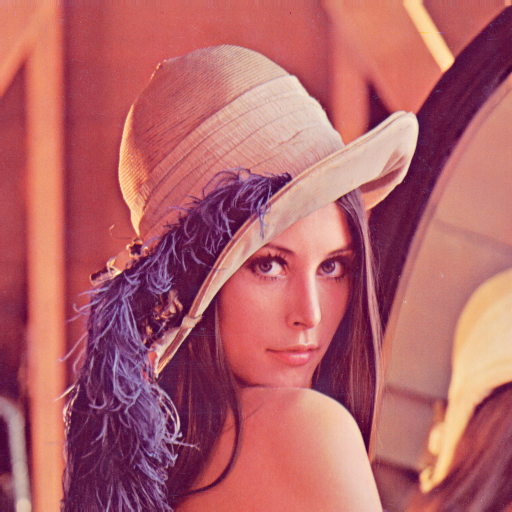

In [24]:
lena

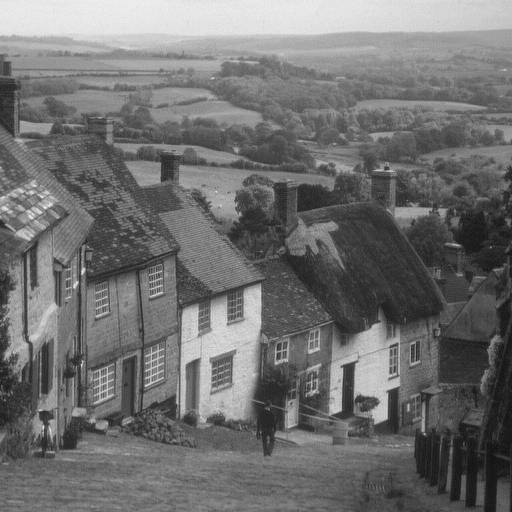

In [25]:
goldhill

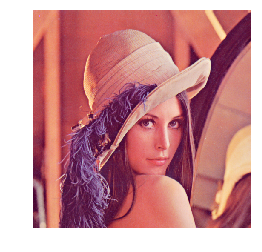

In [24]:
# matplotlibを使って表示する matplotlibのオプションは使えるようになる
import matplotlib.pyplot as plt
%matplotlib inline
plt.axis('off')
plt.imshow(lena)

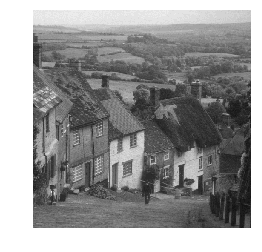

In [30]:
plt.axis('off')
plt.imshow(goldhill)

### OSデフォルトのソフトで画像を表示

In [30]:
lena.show()

## 画像のメタ情報をみる

In [10]:
im = lena
# sizeは (幅, 高さ)
print("画像フォーマット: {}, (画像幅, 画像高さ): {}, 画像モード: {}".format(im.format, im.size, im.mode))
im = goldhill
print("画像フォーマット: {}, (画像幅, 画像高さ): {}, 画像モード: {}".format(im.format, im.size, im.mode))

画像フォーマット: PNG, (画像幅, 画像高さ): (512, 512), 画像モード: RGB
画像フォーマット: BMP, (画像幅, 画像高さ): (512, 512), 画像モード: P


## 画像を結合する

### 結合のやりかた

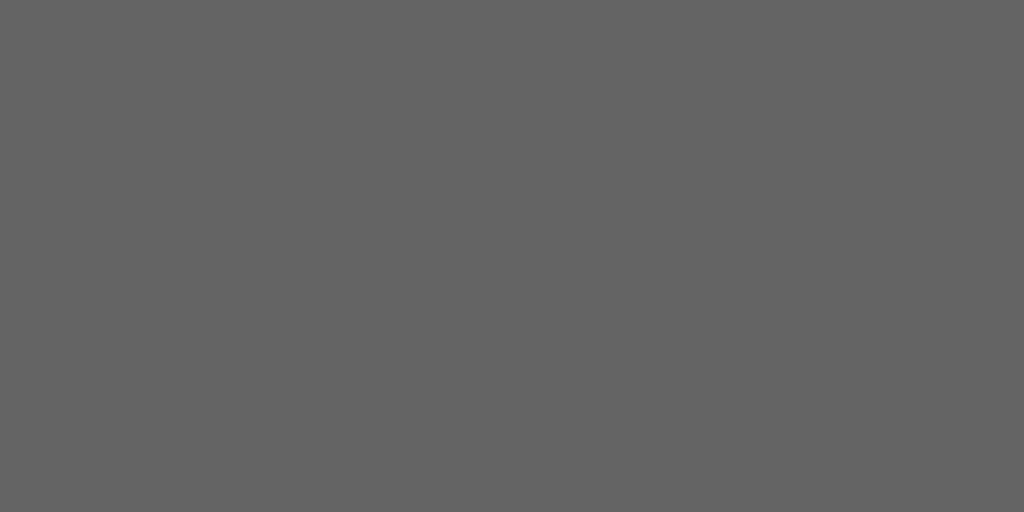

In [11]:
# 最初にキャンバスを用意して、そこに画像を貼り付けていく
height  = lena.height if lena.height >= goldhill.height else goldhill.height
canvas = Image.new('L', (lena.width + goldhill.width, height), color=100)
canvas

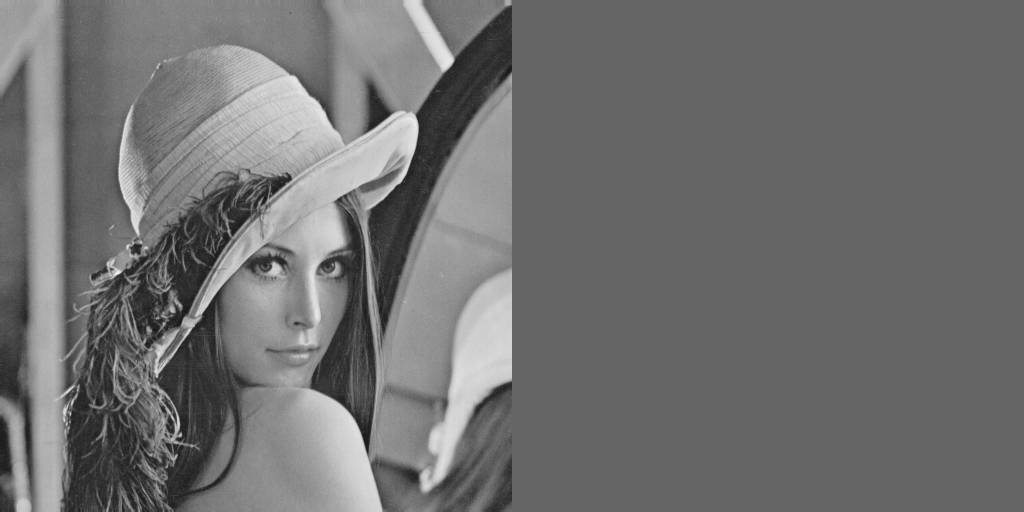

In [12]:
# 最初にlenaを貼る
canvas.paste(lena, (0, 0))
canvas

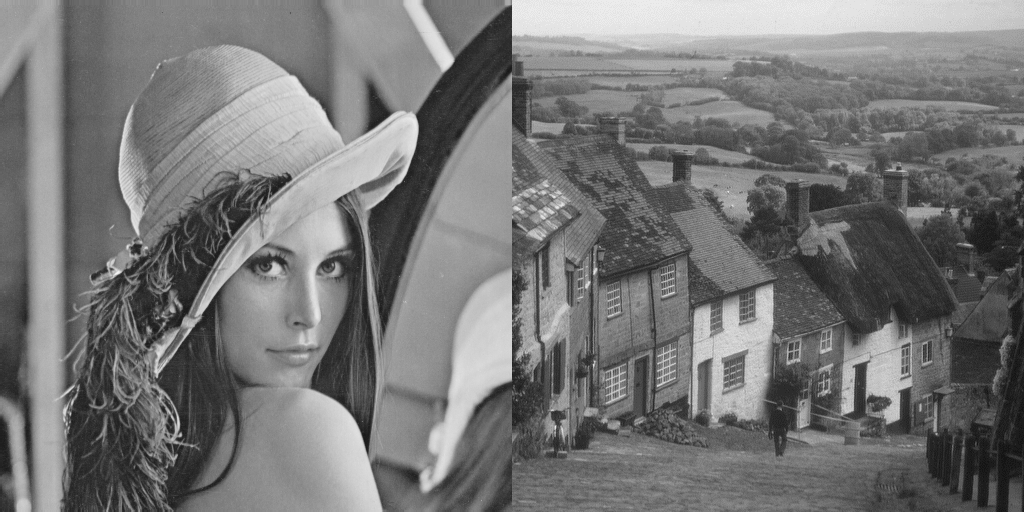

In [13]:
# 次にgoldhillを貼る
canvas.paste(goldhill, (lena.width, 0))
canvas

### (応用例)MNINTの数字を並べて見る

In [ ]:
# 表示用のデータの準備
from torchvision.datasets import MNIST
train_data = MNIST('~/images/ml_images/mnist', train=True, download=True, transform=None)
# Pytorchのトレーニングデータは画像とラベルのセットになっているので、画像だけを取り出す
train_data_imgs = [d[0] for d in train_data]   # [ PIL画像ファイルのリスト ] 60000画像のリストになっている
# 次に数値ごとにPILファイルを分類してリストにする
train_data_imgs_ordered = []  # [[0ラベルの画像リスト], [1ラベルの画像リスト], ....., [9ラベルの画像リスト]]
for i in range(10):
    # ここでラベルiのimageのリストを作る
    i_imgs = [d[0] for d in train_data if d[1]==i ]
    train_data_imgs_ordered.append(i_imgs)

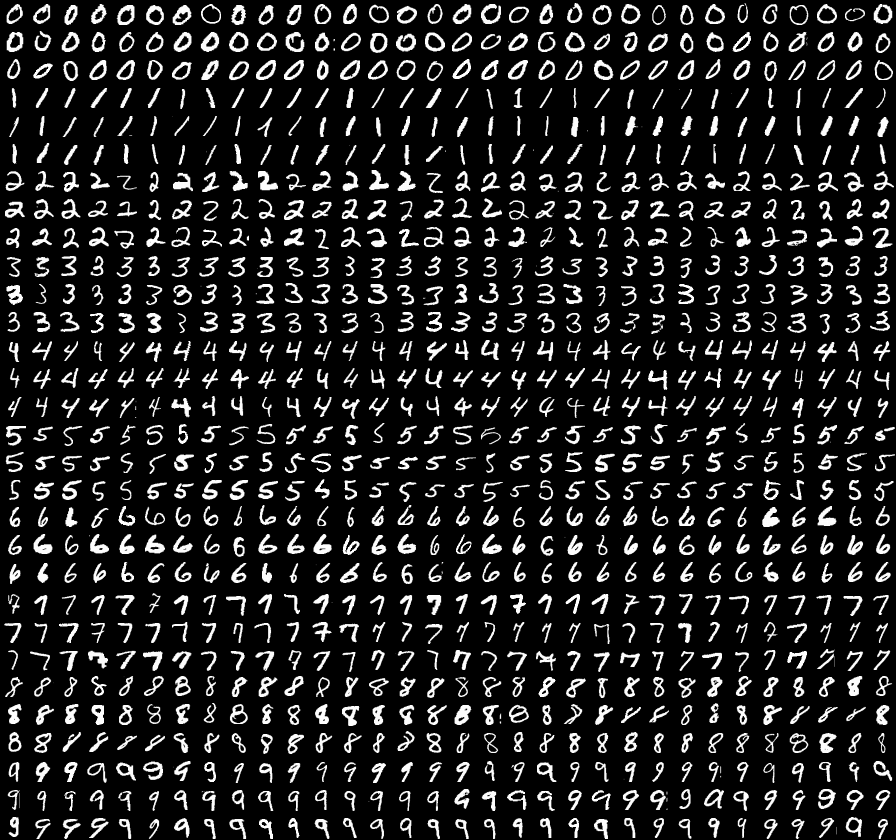

In [17]:
# 全部まとめて3行ずつくらいにして出してみる
col_num = 32  # 1行あたりの画像数
row_num = 3  # 一つの数当たりの行数
img_width = train_data_imgs_ordered[0][0].width
img_height = train_data_imgs_ordered[0][0].height

# 高さは一つの数の行数x10
canvas = Image.new(mode='L', size=(img_width*col_num, img_height*(row_num*10)), color=0)

# 数ごとのfor
number = 0
img_counter = 0
for number in range(10):
    for row_counter in range(row_num):
        for col_counter in range(col_num):
            x_cor = col_counter*img_width
            y_cor = (number*row_num+row_counter)*img_height
            canvas.paste(train_data_imgs_ordered[number][img_counter], (x_cor, y_cor))
            img_counter += 1
# 表示させる
canvas